In [ ]:
from  keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
import tensorflow as tf



In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


In [ ]:
max([max(sequence) for sequence in train_data])


9999

In [ ]:
word_index = imdb.get_word_index()  # mappings of words to their integer indices
reverse_word_index = dict([(val, key) for (key, val) in word_index.items()])    # mapping indices to words
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])


In [ ]:
def vectorize(sequences, dimension=10000):
		results = np.zeros((len(sequences), dimension))
		for i, sequence in enumerate(sequences):
			results[i, sequence] = 1
		return results



In [ ]:
#input preprocessing using vectorization
x_train = vectorize(train_data)
x_test = vectorize(test_data)
# ensure that the labels are in a format compatible with the model's output layer and loss function
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss = 'binary_crossentropy',optimizer='rmsprop',  metrics = ['accuracy'])


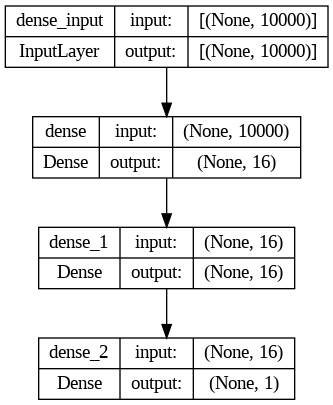

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [17]:


x_val = x_train[:10000]
y_val = y_train[:10000]

# partial_x = x_train[10000:]
# partial_y = y_train[10000:]


In [18]:

history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
print(results)


Epoch 1/20
49/49 [==============================] - 2s 47ms/step - loss: 0.3454 - accuracy: 0.9466 - val_loss: 0.3192 - val_accuracy: 0.9096
Epoch 2/20
49/49 [==============================] - 1s 29ms/step - loss: 0.1357 - accuracy: 0.9607 - val_loss: 0.2012 - val_accuracy: 0.9372
Epoch 3/20
49/49 [==============================] - 1s 30ms/step - loss: 0.1014 - accuracy: 0.9708 - val_loss: 0.1403 - val_accuracy: 0.9569
Epoch 4/20
49/49 [==============================] - 2s 31ms/step - loss: 0.0773 - accuracy: 0.9779 - val_loss: 0.0986 - val_accuracy: 0.9720
Epoch 5/20
49/49 [==============================] - 2s 40ms/step - loss: 0.0550 - accuracy: 0.9850 - val_loss: 0.0931 - val_accuracy: 0.9669
Epoch 6/20
49/49 [==============================] - 2s 42ms/step - loss: 0.0415 - accuracy: 0.9885 - val_loss: 0.0711 - val_accuracy: 0.9773
Epoch 7/20
49/49 [==============================] - 1s 30ms/step - loss: 0.0295 - accuracy: 0.9922 - val_loss: 0.0359 - val_accuracy: 0.9902
Epoch 8/20
49

In [19]:

# history = model.fit(partial_x, partial_y, epochs=20, batch_size=512, validation_data=(x_val, y_val))
# results = model.evaluate(x_test, y_test)
# print(results)


